# Análisis de Imágenes con Azure Computer Vision

## Introducción

En este notebook exploraremos cómo utilizar el servicio de Azure Computer Vision para analizar imágenes, detectar objetos y obtener etiquetas que describan el contenido visual.  
Este servicio es de gran utilidad para aplicaciones como inventarios visuales, detección de objetos, inspección de paneles solares y detección de personas


## 1. Carga de Librerías

En esta sección importamos las librerías necesarias para realizar las peticiones, procesamiento y visualización de imágenes.


In [4]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
from dotenv import load_dotenv
import os   

## 2. Configuración del Servicio Azure
En esta parte definiremos las credenciales y endpoint necesarios para autenticar y usar la API de Azure Computer Vision.
Importante: Nunca compartas tus claves públicamente. Usa variables de entorno para mayor seguridad

In [5]:
subscription_key = os.getenv("AZURE_SUBSCRIPTION_KEY")
region = os.getenv("AZURE_REGION")
endpoint = os.getenv("AZURE_ENDPOINT")
analyze_url = endpoint + "vision/v3.1/analyze"

## 3. Función para Analizar Imagen con Azure Computer Vision
Esta función recibe la ruta de una imagen, la envía al servicio y retorna la probabilidad de los objetos detectados y etiquetas correspondientes

In [6]:
def analyze_image(image_path):
    try:
        image = open(image_path, "rb").read()
        headers = {
            'Ocp-Apim-Subscription-Key': subscription_key,
            'Content-Type': 'application/octet-stream'
        }
        params = {
            'visualFeatures': 'Objects,Tags',
            'language': 'es'
        }

        response = requests.post(analyze_url, headers=headers, params=params, data=image)
        response.raise_for_status()
        analysis = response.json()

        # Mostrar objetos detectados
        print("\nObjetos detectados:")
        if 'objects' in analysis:
            for obj in analysis['objects']:
                print(f"- {obj['object']}: {obj['confidence']:.2%}")

        # Mostrar etiquetas generales
        print("\nEtiquetas generales:")
        if 'tags' in analysis:
            for tag in analysis['tags']:
                print(f"- {tag['name']}: {tag['confidence']:.2%}")

        return analysis

    except Exception as e:
        print(f"Error: {e}")
        return None


## 4. Función para Mostrar Imagen con Detección
Esta función visualiza la imagen y dibuja recuadros alrededor de los objetos detectados, mostrando etiquetas y confianza.

In [8]:
def show_image_with_detections(image_path, analysis):
    original_image = Image.open(image_path)
    image_array = np.array(original_image)

    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image_array)

    if 'objects' in analysis:
        for obj in analysis['objects']:
            rect = obj['rectangle']
            ax.add_patch(plt.Rectangle(
                (rect['x'], rect['y']),
                rect['w'], rect['h'],
                fill=False,
                edgecolor='red',
                linewidth=2
            ))
            plt.text(
                rect['x'], rect['y'] - 10,
                f"{obj['object']} ({obj['confidence']:.2%})",
                color='white',
                bbox={'facecolor': 'red', 'alpha': 0.5}
            )

    plt.axis('off')
    plt.title("Análisis de Imagen")
    plt.show()


## 5. Ejemplos de Uso
Se analiza una imagen de futbolistas en un campo de futbol, y se muestran los resultados.


Objetos detectados:
- footwear: 51.10%
- soccer ball: 82.10%
- footwear: 51.60%
- footwear: 64.20%
- person: 67.00%
- person: 83.10%
- person: 77.20%

Etiquetas generales:
- fútbol: 99.99%
- pasto: 99.95%
- jugando: 99.62%
- persona: 98.91%
- bola: 98.86%
- competencia de atletismo: 98.43%
- pelota: 98.11%
- campo: 97.67%
- equipamiento deportivo: 94.09%
- deporte: 93.51%
- grupo: 91.60%
- exterior: 86.24%
- joven: 85.83%
- juego: 84.97%
- parque: 84.91%
- balón de fútbol: 61.56%
- jugador de fútbol: 52.33%
- patada: 51.14%
- partido: 26.29%


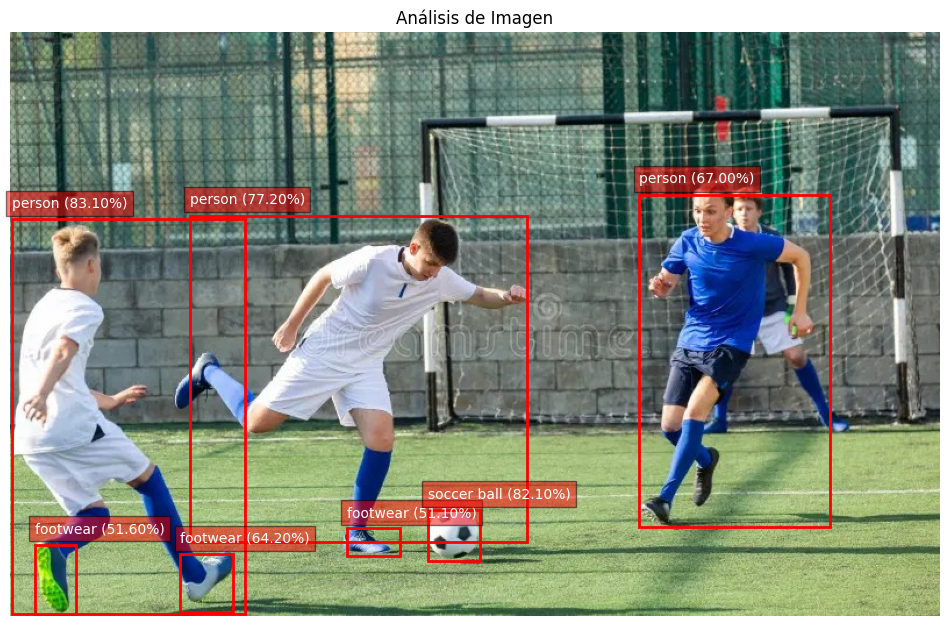

In [9]:
image_path = "images/futbolistas.jpg"  # Cambia por la ruta de tu imagen
analysis = analyze_image(image_path)
if analysis:
    show_image_with_detections(image_path, analysis)


## 6. Un ejemplo más
Se analiza una imagen de mascotas y se muestran los resultados con su respectiva probabilidad


Objetos detectados:
- cat: 79.40%
- cat: 87.10%
- spaniel: 85.90%
- dog: 73.50%

Etiquetas generales:
- sentado: 99.39%
- gato: 98.52%
- carnívoro: 97.52%
- perro: 96.86%
- interior: 95.85%
- animal: 95.29%
- puesto: 87.48%
- blanco: 63.68%


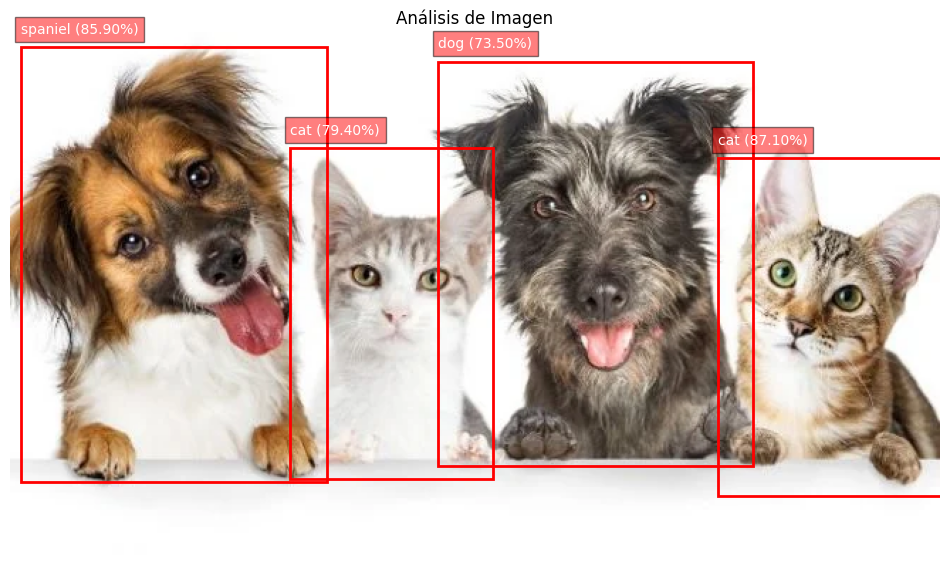

In [15]:
image_path = "images/animales.webp"
analysis = analyze_image(image_path)
if analysis:
    show_image_with_detections(image_path, analysis)


## 6. Un ultimo ejemplo de clasificación
Se analiza una imagen de una familia y sus mascotas y se muestran los resultados con su respectiva probabilida


Objetos detectados:
- dog: 70.50%
- person: 74.10%
- dog: 69.20%
- dog: 72.90%
- dog: 84.90%
- dog: 79.90%
- dog: 86.40%
- person: 56.20%

Etiquetas generales:
- perro: 99.99%
- interior: 99.90%
- pared: 98.78%
- carnívoro: 98.22%
- sentado: 94.69%
- animal: 93.05%
- cachorro: 76.71%
- café: 76.50%


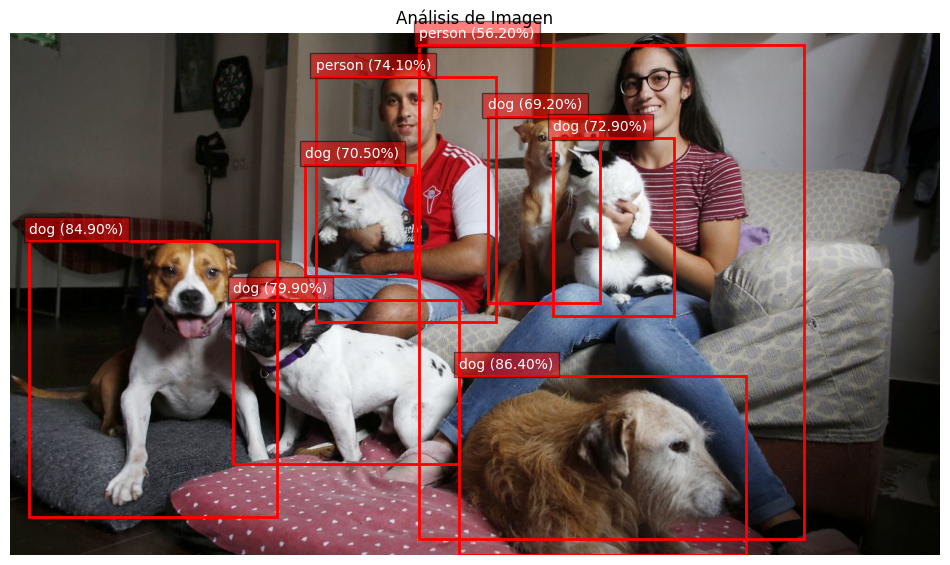

In [16]:
image_path = "images/familia.jpg"
analysis = analyze_image(image_path)
if analysis:
    show_image_with_detections(image_path, analysis)

## 7. Conclusiones
Azure Computer Vision permite un análisis visual rápido con un margen de error relativamente bajo. Sin embargo, si se busca un mayor grado de precisión, se recomienda complementar con Custom Vision para detección de objetos específicos o personalizados